In [ ]:
pip install plotly

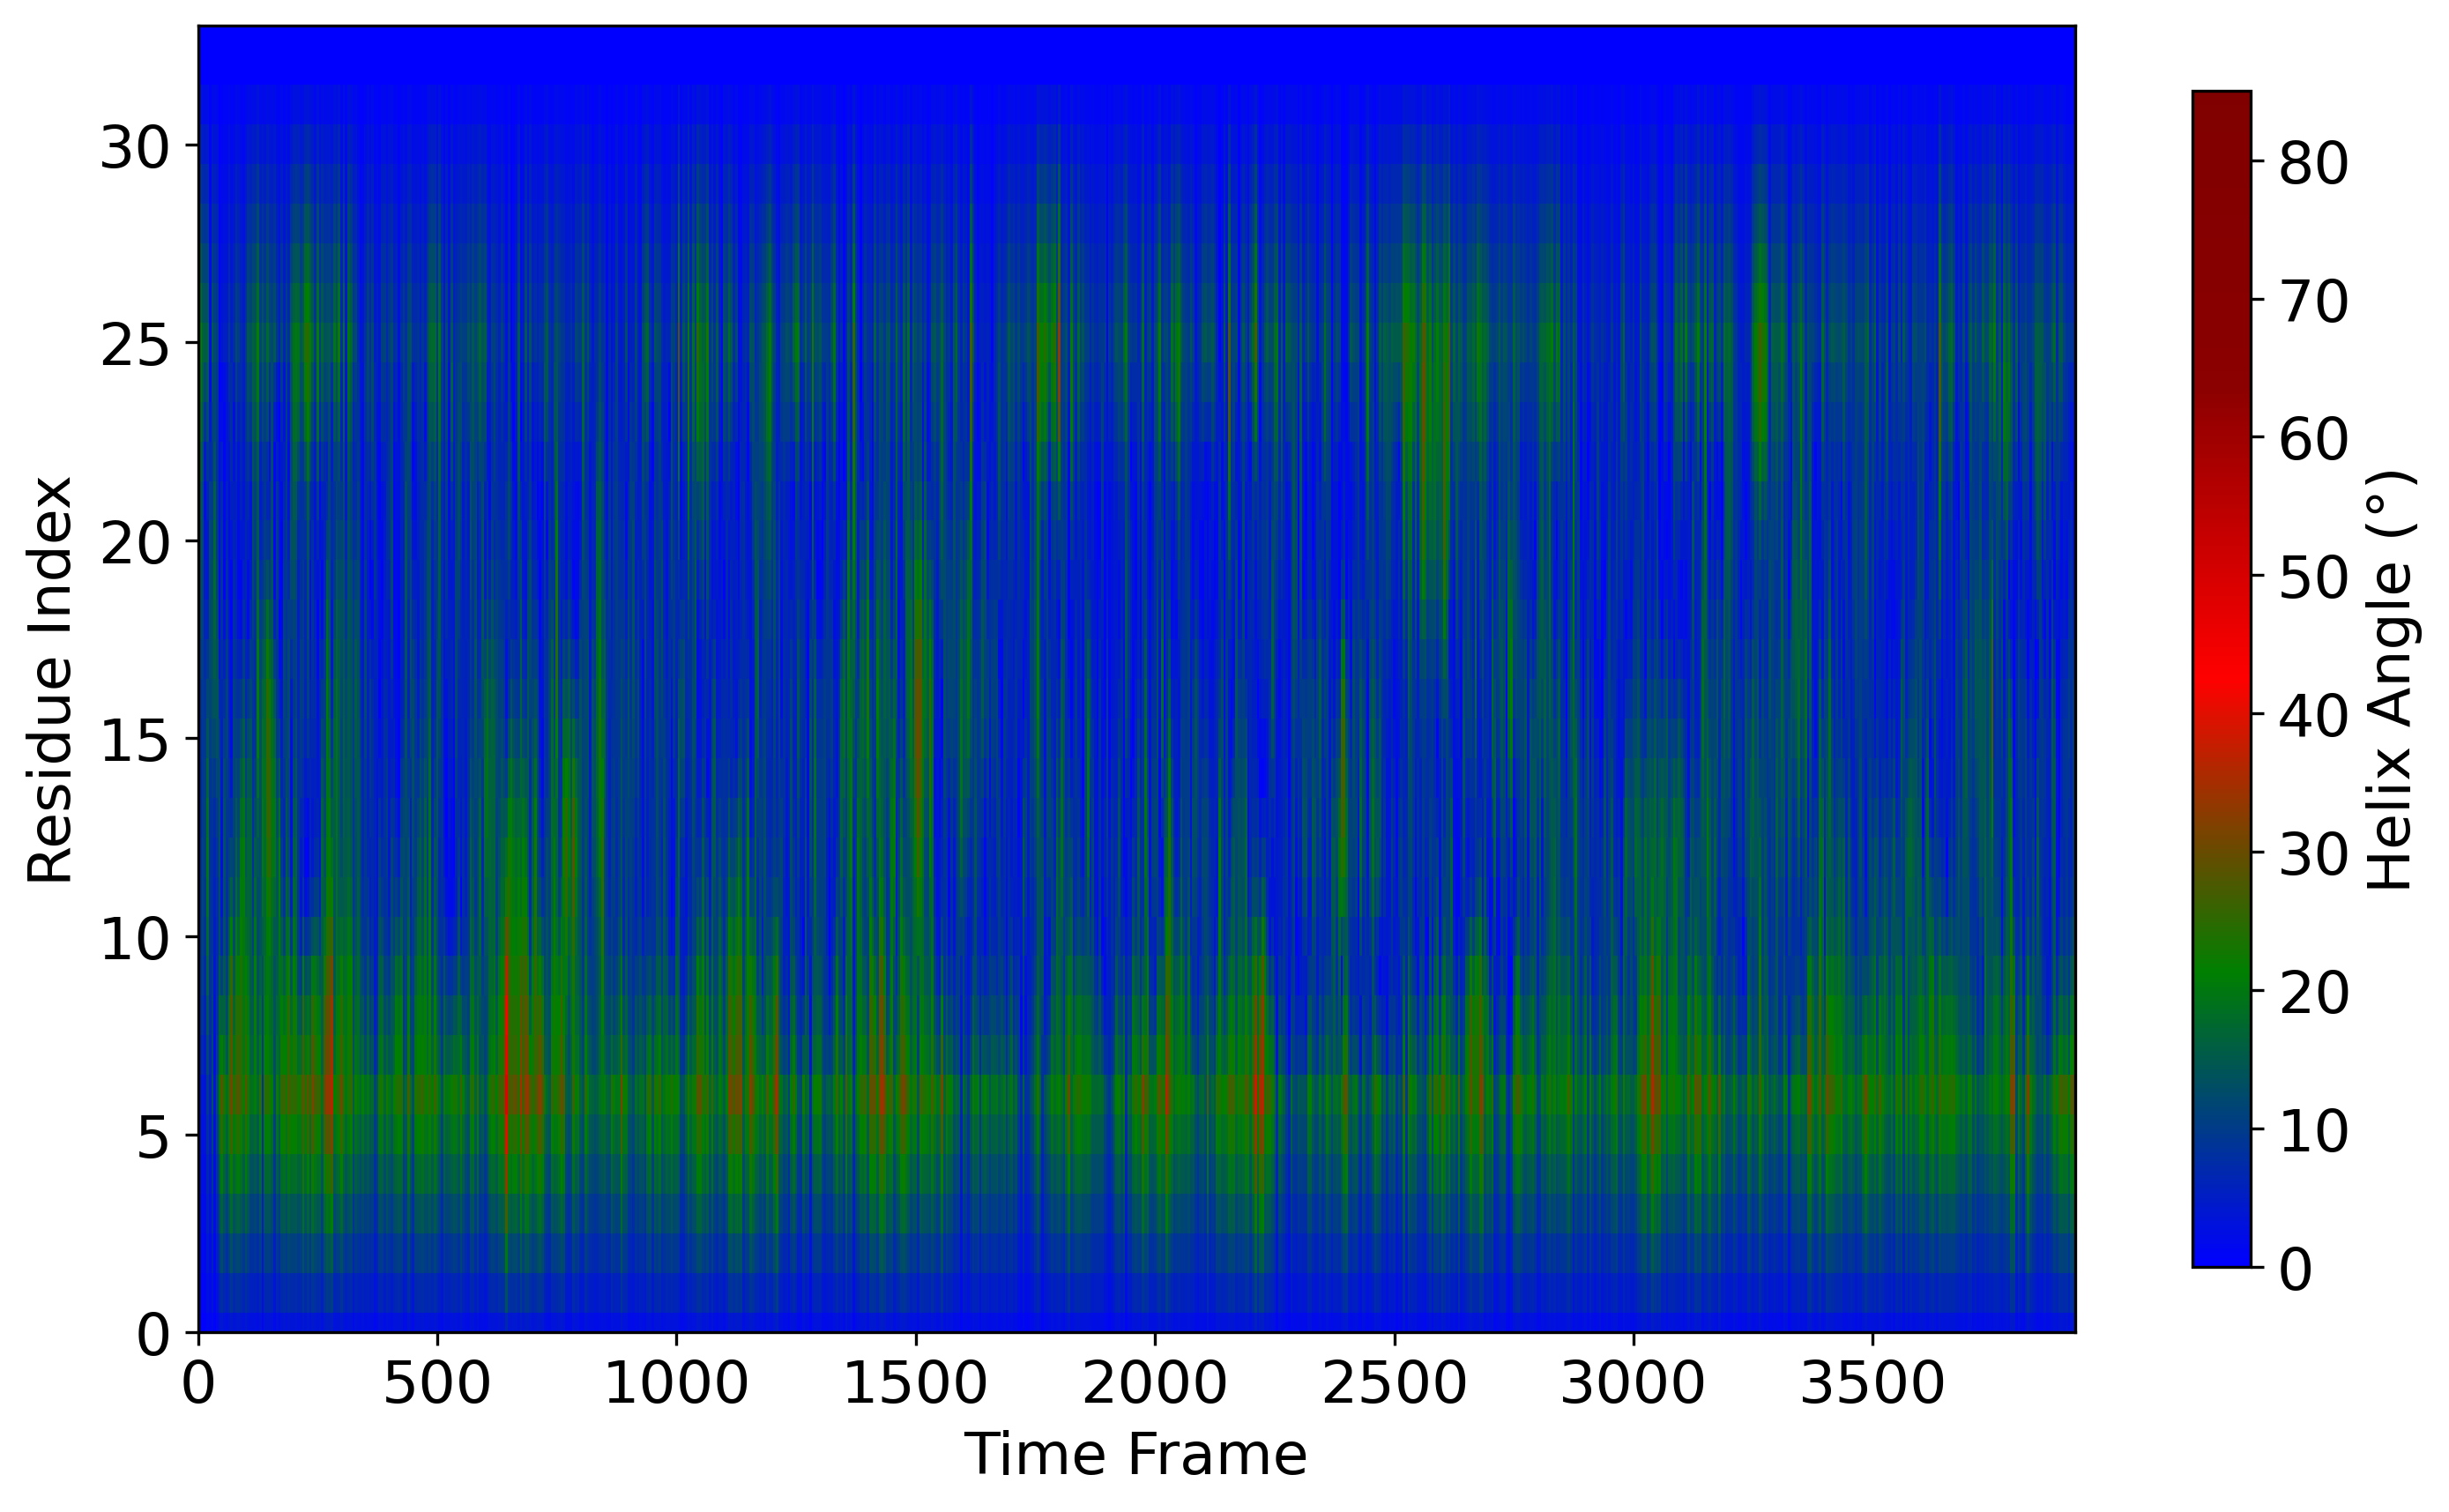

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# === Load and parse the data ===
file_path = "N2/surf_3D_all.dat"  # Change path if needed

def is_numeric_line(line):
    try:
        [float(x) for x in line.strip().split()]
        return True
    except ValueError:
        return False

with open(file_path, 'r') as f:
    lines = f.readlines()

numeric_lines = [line for line in lines if is_numeric_line(line)]
parsed_data = [list(map(float, line.strip().split())) for line in numeric_lines]
df = pd.DataFrame(parsed_data)

# Remove header row if necessary
if df.iloc[0, 0] == 0.0 and df.iloc[0, 1] == 1.0:
    df = df.iloc[1:].copy()

# === Extract data ===
frames = df.iloc[:, 0].values
values = df.iloc[:, 2:].values
values_clean = np.nan_to_num(values, nan=0.0, posinf=0.0, neginf=0.0)
Z = values_clean.T  # (time, residue)
residues = np.arange(Z.shape[0])
X, Y = np.meshgrid(frames, residues)

X = np.nan_to_num(X)
Y = np.nan_to_num(Y)
Z = np.nan_to_num(Z)


# === Define Bendix-style colormap: blue → green → red
bendix_cmap = LinearSegmentedColormap.from_list("bendix", ["blue", "green", "red","darkred","maroon"])

# === Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
heatmap = ax.pcolormesh(X, Y, Z, cmap=bendix_cmap, shading='auto')
heatmap = ax.pcolormesh(X, Y, Z, cmap=bendix_cmap, shading='auto', vmin=0, vmax=85)


cbar = plt.colorbar(heatmap, ax=ax, shrink=0.9)
cbar.set_label('Helix Angle (°)', fontsize=16)

# Axis tick numbers
ax.tick_params(axis='both', labelsize=16)  
cbar.ax.tick_params(labelsize=16)

ax.set_xlabel('Time Frame', fontsize=16)
ax.set_ylabel('Residue Index', fontsize=16)
#ax.set_title('2D Heatmap of Helix Angle (Residue vs. Time)', fontsize=14)
ax.set_ylim(0, 33)

plt.tight_layout()
plt.savefig("N2_surf_2D_residue_time_helixangle_34.png", dpi=300)
plt.show()


In [52]:
import plotly.graph_objects as go
import numpy as np

# Use the already cleaned and transposed Z, residues, and frames from earlier
# Z shape: (time, residues)
# residues: residue indices
# frames: time/frame index

# === Create Bendix-style custom colorscale for Plotly ===
bendix_colorscale = [
    [0.0, 'blue'],
    [0.5, 'green'],
    [1.0, 'red']
]
print(len(Z),len(residues), len(frames))
# === Plotly 3D surface with Bendix colormap ===
fig = go.Figure(data=[go.Surface(
    z=Z,
    x=frames[:],  # X: residue index
    y=residues[:33],    # Y: time/frame
    colorscale=bendix_colorscale,
    cmin=0, #np.min(Z),
    cmax=45, #np.max(Z),
    colorbar=dict(title='Helix Angle (°)')
)])

fig.update_layout(
    scene=dict(
        yaxis_title='Residue Index',
        xaxis_title='Time Frame',
        zaxis_title='Helix Angle (°)',
    ),
    autosize=True,
    width=900,
    height=700
)

fig.show()


136 136 1575


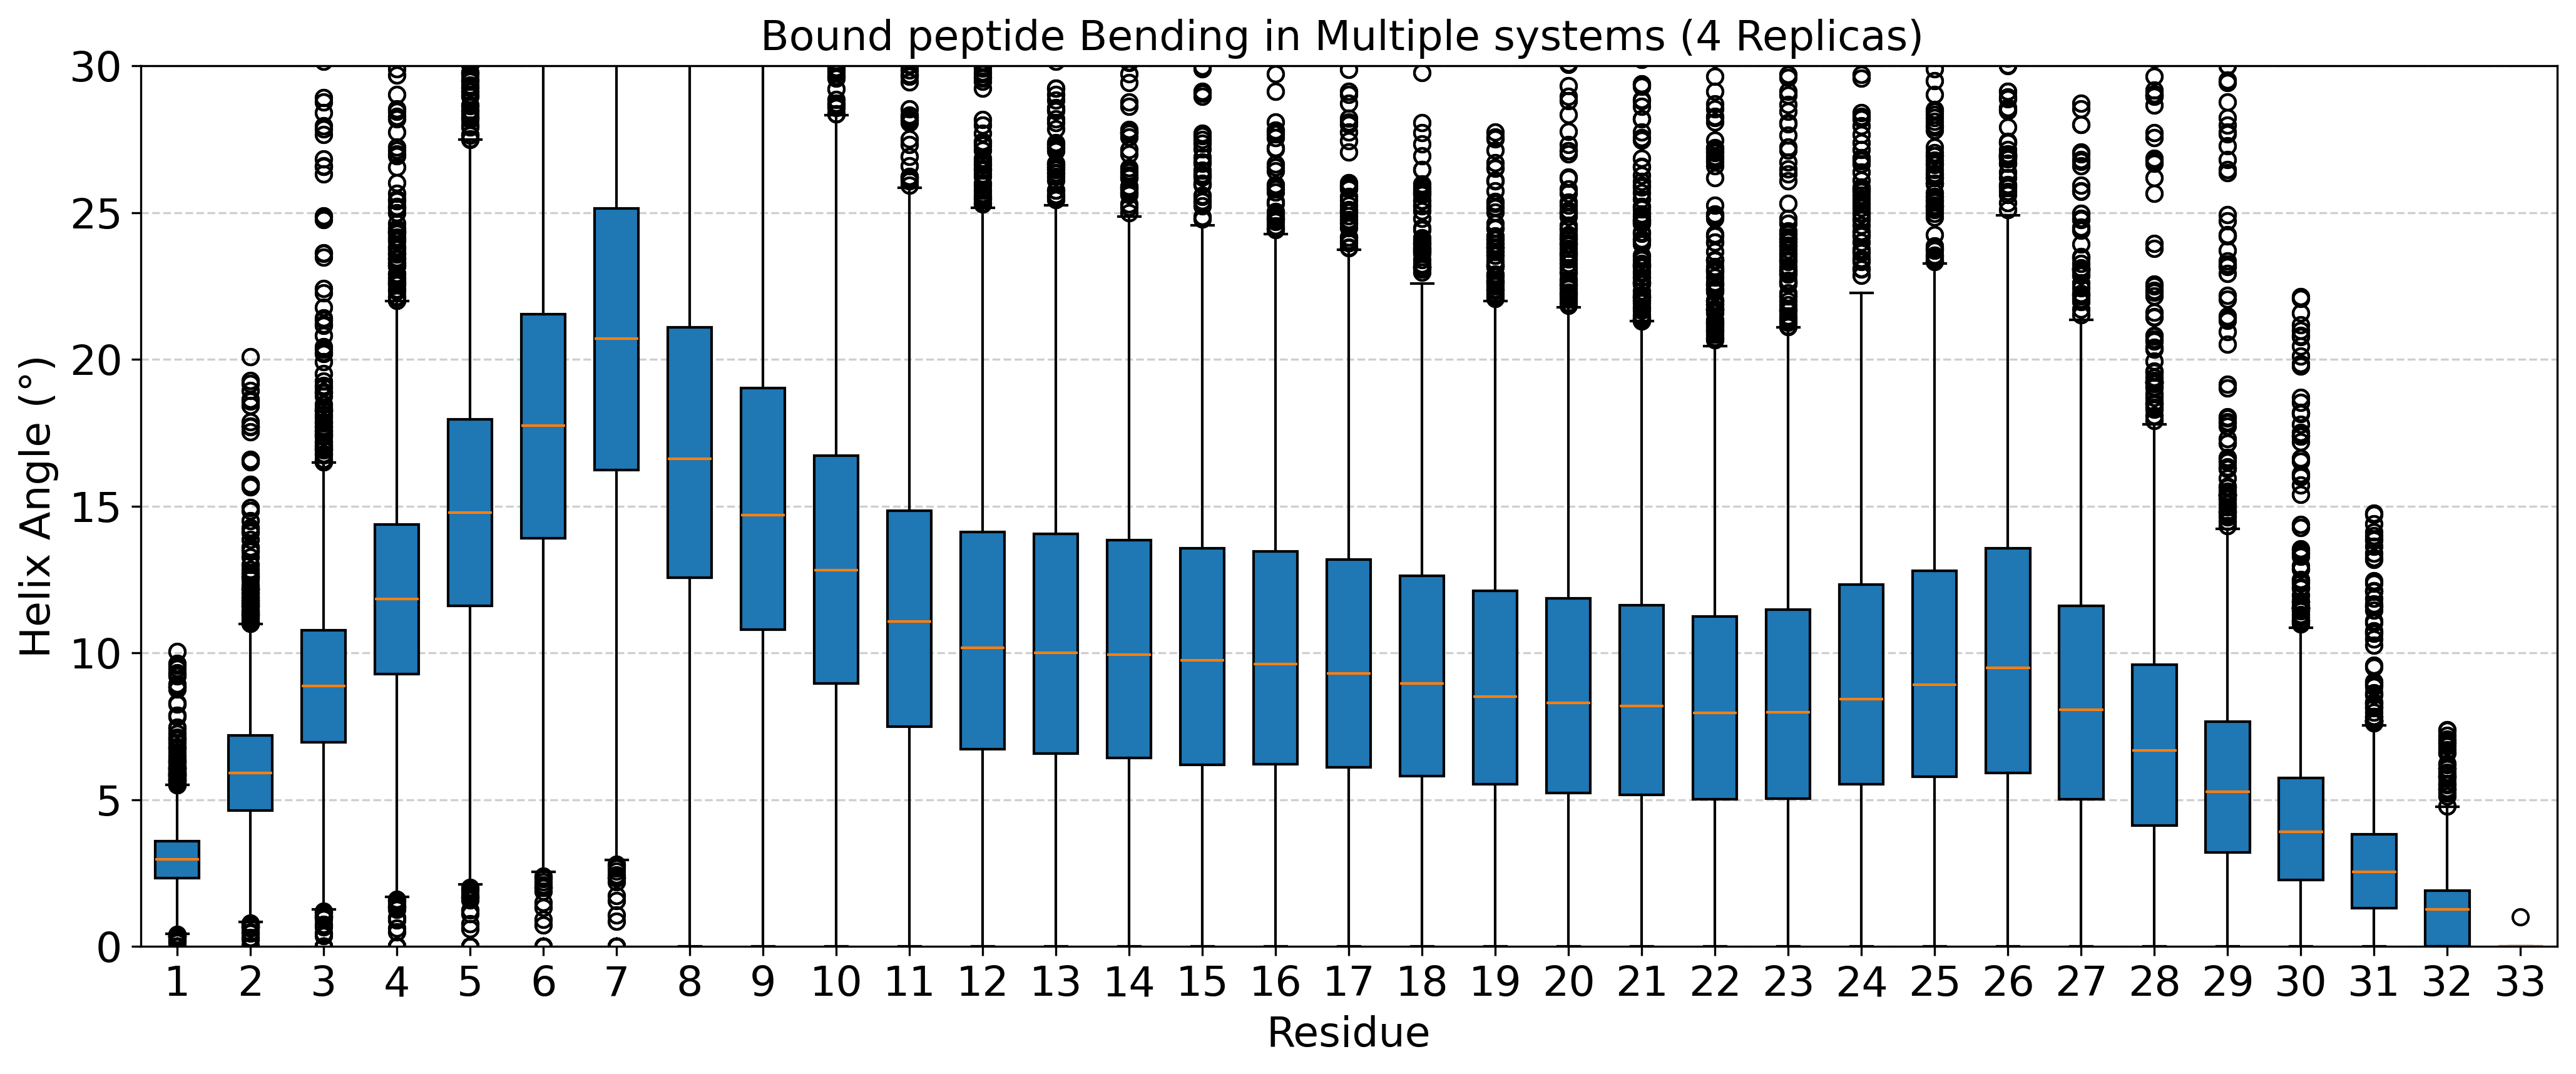

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_paths = ["N2/surf_3D_all.dat", "N4/surf_3D_all.dat", "N5/surf_3D_all.dat", "N7/surf_3D_all.dat"]

def is_numeric_line(line):
    try:
        [float(x) for x in line.strip().split()]
        return True
    except ValueError:
        return False

n_residues = 33  # Only use the first 33 residues (index 0 to 32)
residue_helix_angles = {i: [] for i in range(n_residues)}

for file_path in file_paths:
    with open(file_path, 'r') as f:
        lines = f.readlines()

    numeric_lines = [line for line in lines if is_numeric_line(line)]
    parsed_data = [list(map(float, line.strip().split())) for line in numeric_lines]
    df = pd.DataFrame(parsed_data)

    if df.iloc[0, 0] == 0.0 and df.iloc[0, 1] == 1.0:
        df = df.iloc[1:].copy()

    values = df.iloc[:, 2:].values
    values_clean = np.nan_to_num(values, nan=0.0, posinf=0.0, neginf=0.0)

    for i in range(n_residues):
        residue_helix_angles[i].extend(values_clean[:, i])

# === Prepare data for boxplot ===
data_for_plot = [residue_helix_angles[i] for i in range(n_residues)]

plt.figure(figsize=(14, 6), dpi=300)
plt.boxplot(data_for_plot, positions=range(1, n_residues + 1), widths=0.6, patch_artist=True)
plt.rcParams.update({'font.size': 16})

plt.xlabel("Residue", fontsize=16)
plt.ylabel("Helix Angle (°)", fontsize=16)
plt.title("Bound peptide Bending in Multiple systems (4 Replicas) ", fontsize=16)
plt.xticks(range(1, n_residues + 1), labels=range(1, n_residues + 1))
plt.ylim(0, 30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



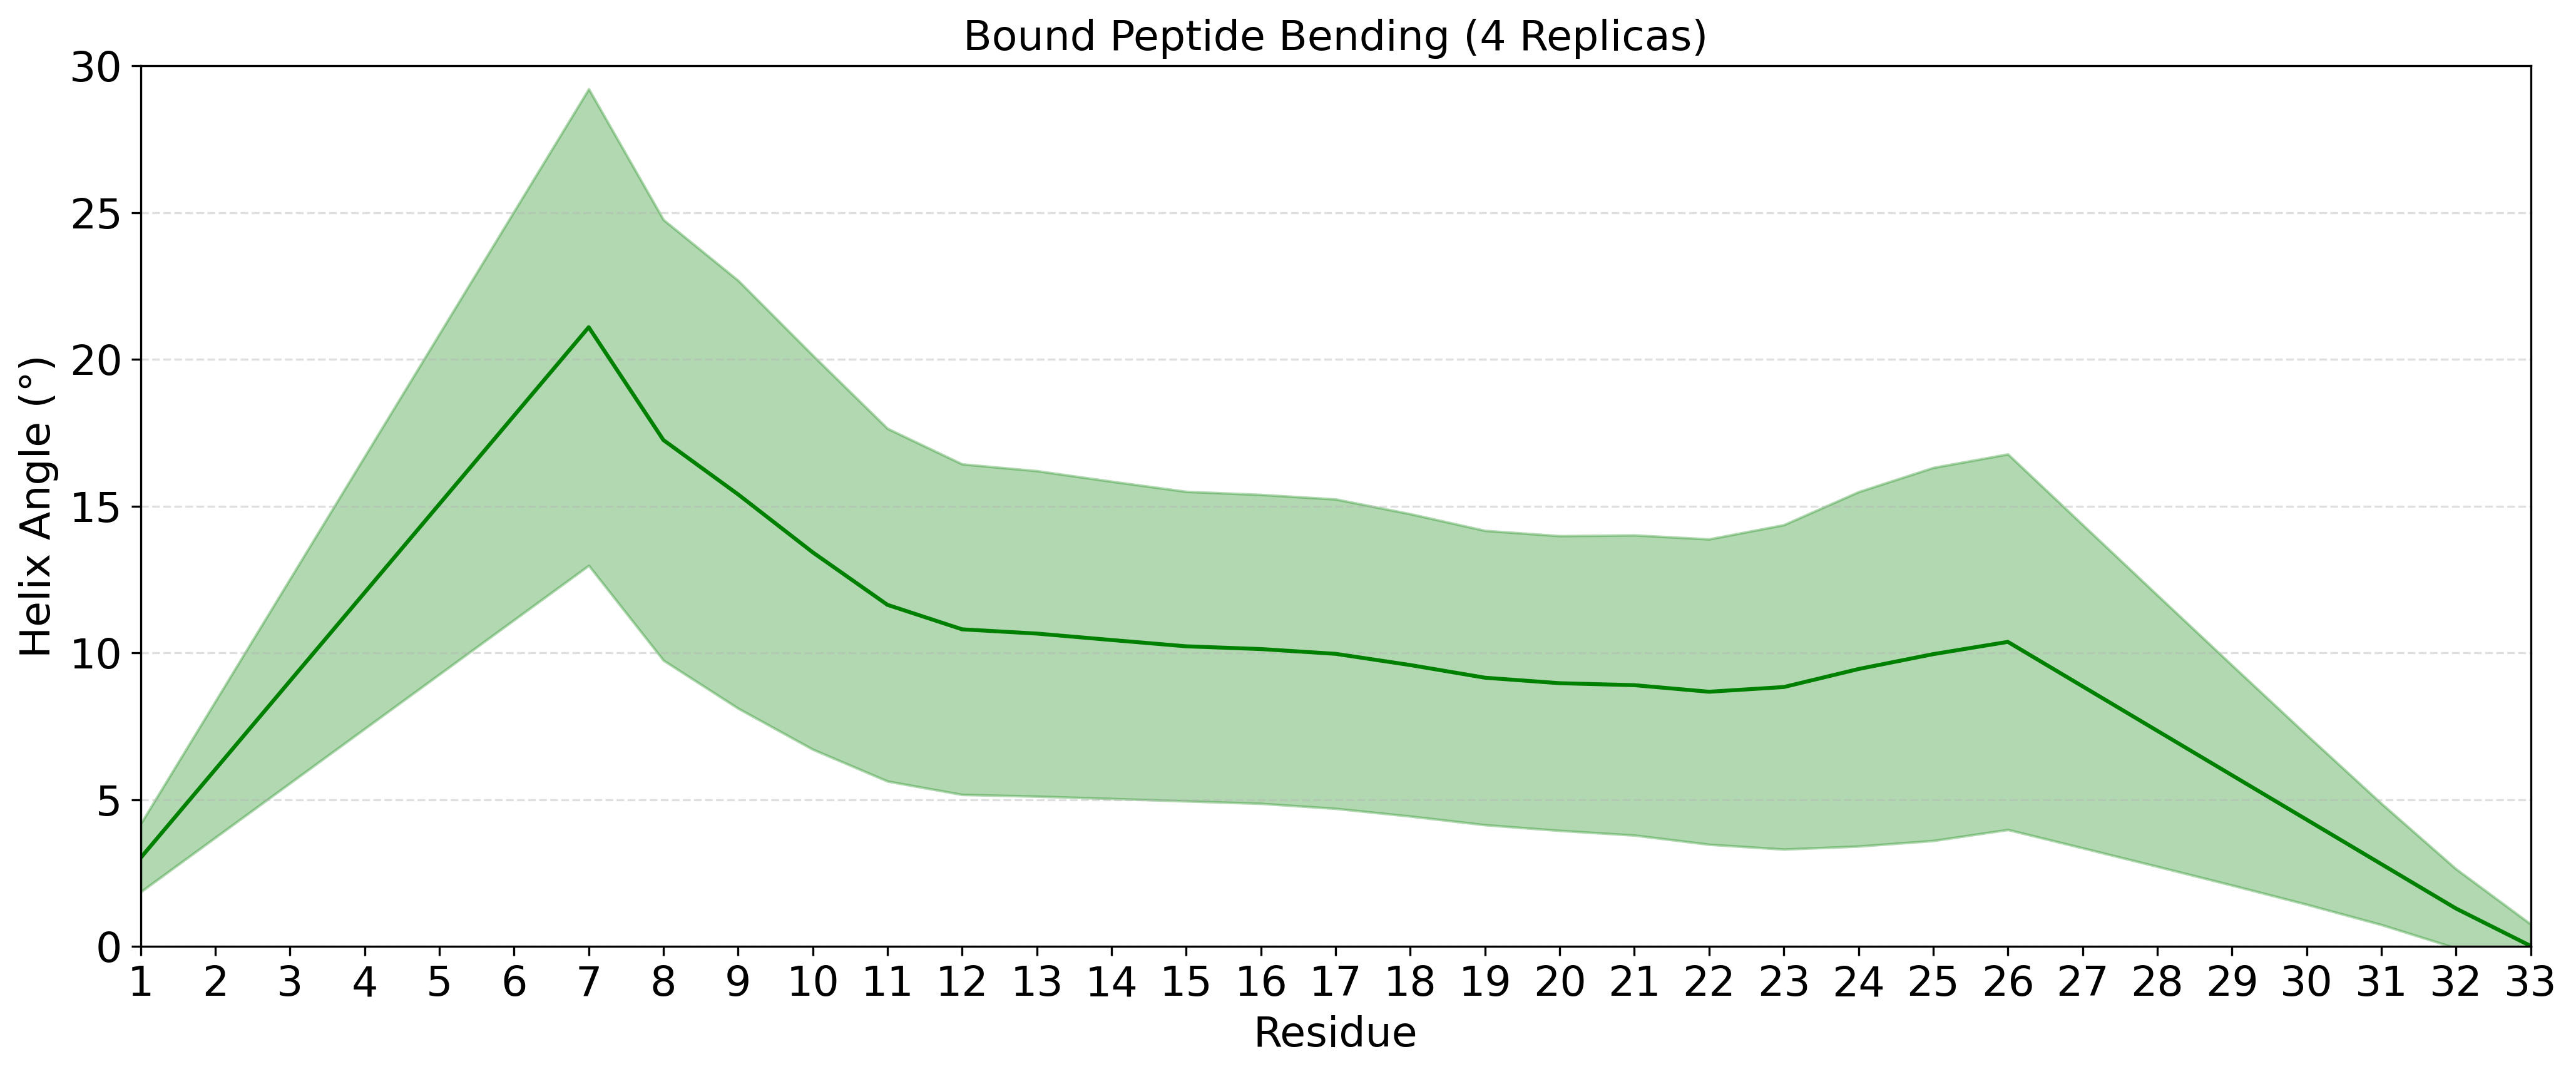

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})  # Global font size

file_paths = ["N2/surf_3D_all.dat", "N4/surf_3D_all.dat", "N5/surf_3D_all.dat", "N7/surf_3D_all.dat"]

def is_numeric_line(line):
    try:
        [float(x) for x in line.strip().split()]
        return True
    except ValueError:
        return False

n_residues = 33
all_data = []  # Will collect 2D arrays of shape (frames, residues)

for file_path in file_paths:
    with open(file_path, 'r') as f:
        lines = f.readlines()

    numeric_lines = [line for line in lines if is_numeric_line(line)]
    parsed_data = [list(map(float, line.strip().split())) for line in numeric_lines]
    df = pd.DataFrame(parsed_data)

    if df.iloc[0, 0] == 0.0 and df.iloc[0, 1] == 1.0:
        df = df.iloc[1:].copy()

    values = df.iloc[:, 2:].values
    values_clean = np.nan_to_num(values, nan=0.0, posinf=0.0, neginf=0.0)

    all_data.append(values_clean[:, :n_residues])  # Only use first 33 residues

# === Stack and calculate mean and std across all time points from all replicas ===
combined_data = np.vstack(all_data)  # Shape: (total_frames, n_residues)
mean_per_residue = np.mean(combined_data, axis=0)
std_per_residue = np.std(combined_data, axis=0)

residue_indices = np.arange(1, n_residues + 1)

# === Plot mean ± std shaded area ===
plt.figure(figsize=(14, 6), dpi=300)
plt.plot(residue_indices, mean_per_residue, label='Multiple systems', color='green')
plt.fill_between(residue_indices,
                 mean_per_residue - std_per_residue,
                 mean_per_residue + std_per_residue,
                 color='green', alpha=0.3, label='_nolegend_')

plt.xlabel("Residue", fontsize=16)
plt.ylabel("Helix Angle (°)", fontsize=16)
plt.title("Bound Peptide Bending (4 Replicas)", fontsize=16)
plt.ylim(0, 30)
plt.xticks(residue_indices)
plt.grid(axis='y', linestyle='--', alpha=0.4)
#plt.legend(fontsize=16)
plt.xlim(1,33)
plt.tight_layout()
plt.savefig("bound_agnle_histo_multiple.png", dpi=300)
plt.show()
